In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [73]:
#df = pd.read_csv('DAX Dati Storici.csv',index_col = 0) assegno già l'indice

df = pd.read_csv('DAX Dati Storici.csv')
df

,Data,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
0,25.03.2022,"14.305,76","14.332,26","14.428,03","14.247,38","73,04M","0,22%"
1,24.03.2022,"14.273,79","14.305,80","14.375,82","14.187,82","77,32M","-0,07%"
2,23.03.2022,"14.283,65","14.532,84","14.539,31","14.226,43","76,38M","-1,31%"
3,22.03.2022,"14.473,20","14.365,67","14.508,01","14.343,34","79,55M","1,02%"
4,21.03.2022,"14.326,97","14.385,82","14.457,30","14.306,26","69,81M","-0,60%"
...,...,...,...,...,...,...,...
3100,08.01.2010,"6.037,61","6.028,62","6.053,04","5.972,24",-,"0,30%"
3101,07.01.2010,"6.019,36","6.016,80","6.037,57","5.961,25",-,"-0,25%"
3102,06.01.2010,"6.034,33","6.032,39","6.047,57","5.997,09",-,"0,04%"
3103,05.01.2010,"6.031,86","6.043,94","6.058,02","6.015,67",-,"-0,27%"


In [74]:
df.rename(columns={"Vol.":"Vol"}, inplace=True)
df.rename(columns={"Var. %":"Var"},inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      3105 non-null   object
 1   Ultimo    3105 non-null   object
 2   Apertura  3105 non-null   object
 3   Massimo   3105 non-null   object
 4   Minimo    3105 non-null   object
 5   Vol       3105 non-null   object
 6   Var       3105 non-null   object
dtypes: object(7)
memory usage: 169.9+ KB


In [76]:
df['Ultimo'] = df.Ultimo.str.replace(',', '.')
df['Apertura'] = df.Apertura.str.replace(',', '.')
df['Massimo'] = df.Massimo.str.replace(',', '.')
df['Minimo'] = df.Minimo.str.replace(',', '.')
df["Vol"] = df.Vol.str.replace(',', '.')
df["Var"] = df.Var.str.replace(',', '.')
df["Vol"] =df.Vol.str.replace("M","")

In [77]:
df['Ultimo'] = df.Ultimo.str.replace('.','')
df['Apertura'] = df.Apertura.str.replace('.','')
df['Massimo'] = df.Massimo.str.replace('.','')
df['Minimo'] = df.Minimo.str.replace('.','')
df["Vol"] = df.Vol.str.replace('.','')

In [78]:
df.head()

,Data,Ultimo,Apertura,Massimo,Minimo,Vol,Var
0,25.03.2022,1430576,1433226,1442803,1424738,7304,0.22%
1,24.03.2022,1427379,1430580,1437582,1418782,7732,-0.07%
2,23.03.2022,1428365,1453284,1453931,1422643,7638,-1.31%
3,22.03.2022,1447320,1436567,1450801,1434334,7955,1.02%
4,21.03.2022,1432697,1438582,1445730,1430626,6981,-0.60%


In [79]:
df["Vol"] =df.Vol.str.replace("-","0")
df["Var"] =df.Var.str.replace("%","")

In [80]:
df['Ultimo']=pd.to_numeric(df['Ultimo'])
df['Apertura']=pd.to_numeric(df['Apertura'])
df['Massimo']=pd.to_numeric(df['Massimo'])
df['Minimo']=pd.to_numeric(df['Minimo'])
df['Vol']=pd.to_numeric(df['Vol'])
df['Var']=pd.to_numeric(df['Var'])

In [81]:
df["Ultimo"]=df["Ultimo"]/100
df["Apertura"]=df["Apertura"]/100
df["Massimo"]=df["Massimo"]/100
df["Minimo"]=df["Minimo"]/100
df["Vol"]=df["Vol"]*1000

In [82]:
df.head()

,Data,Ultimo,Apertura,Massimo,Minimo,Vol,Var
0,25.03.2022,14305.76,14332.26,14428.03,14247.38,7304000,0.22
1,24.03.2022,14273.79,14305.80,14375.82,14187.82,7732000,-0.07
2,23.03.2022,14283.65,14532.84,14539.31,14226.43,7638000,-1.31
3,22.03.2022,14473.20,14365.67,14508.01,14343.34,7955000,1.02
4,21.03.2022,14326.97,14385.82,14457.30,14306.26,6981000,-0.60


In [83]:
df=df.sort_index(ascending=False)

In [84]:
df

,Data,Ultimo,Apertura,Massimo,Minimo,Vol,Var
3104,04.01.2010,6048.30,5975.52,6048.30,5974.43,0,1.53
3103,05.01.2010,6031.86,6043.94,6058.02,6015.67,0,-0.27
3102,06.01.2010,6034.33,6032.39,6047.57,5997.09,0,0.04
3101,07.01.2010,6019.36,6016.80,6037.57,5961.25,0,-0.25
3100,08.01.2010,6037.61,6028.62,6053.04,5972.24,0,0.30
...,...,...,...,...,...,...,...
4,21.03.2022,14326.97,14385.82,14457.30,14306.26,6981000,-0.60
3,22.03.2022,14473.20,14365.67,14508.01,14343.34,7955000,1.02
2,23.03.2022,14283.65,14532.84,14539.31,14226.43,7638000,-1.31
1,24.03.2022,14273.79,14305.80,14375.82,14187.82,7732000,-0.07


In [85]:
df.index = pd.to_datetime(df['Data'], dayfirst=True)

In [86]:
df

,Data,Ultimo,Apertura,Massimo,Minimo,Vol,Var
Data,,,,,,,
2010-01-04,04.01.2010,6048.30,5975.52,6048.30,5974.43,0,1.53
2010-01-05,05.01.2010,6031.86,6043.94,6058.02,6015.67,0,-0.27
2010-01-06,06.01.2010,6034.33,6032.39,6047.57,5997.09,0,0.04
2010-01-07,07.01.2010,6019.36,6016.80,6037.57,5961.25,0,-0.25
2010-01-08,08.01.2010,6037.61,6028.62,6053.04,5972.24,0,0.30
...,...,...,...,...,...,...,...
2022-03-21,21.03.2022,14326.97,14385.82,14457.30,14306.26,6981000,-0.60
2022-03-22,22.03.2022,14473.20,14365.67,14508.01,14343.34,7955000,1.02
2022-03-23,23.03.2022,14283.65,14532.84,14539.31,14226.43,7638000,-1.31


In [87]:
df.rename(columns={"Data":"data"}, inplace=True)

In [88]:
df = df.drop("data",axis=1)

In [89]:
# number of missing values in each column
df.isnull().sum().sum()==0
df.isnull().sum()

Ultimo      0
Apertura    0
Massimo     0
Minimo      0
Vol         0
Var         0
dtype: int64

In [ ]:
plt.figure(figsize=(25,15))
df['Apertura'].plot()
plt.show()

In [26]:
df.loc['2010-01-04':'2010-05-14']

,Ultimo,Apertura,Massimo,Minimo,Vol,Var
Data,,,,,,


In [90]:
df.drop(df.loc[df['Vol']==0].index, inplace=True)

In [91]:
df

,Ultimo,Apertura,Massimo,Minimo,Vol,Var
Data,,,,,,
2010-05-17,6066.92,6029.91,6151.54,6026.32,14499000,0.17
2010-05-18,6155.93,6144.08,6181.26,6113.87,12211000,1.47
2010-05-19,5988.67,6091.85,6124.81,5972.17,18544000,-2.72
2010-05-20,5867.88,6023.11,6043.84,5780.73,19260000,-2.02
2010-05-21,5829.25,5835.22,5872.65,5689.18,34195000,-0.66
...,...,...,...,...,...,...
2022-03-21,14326.97,14385.82,14457.30,14306.26,6981000,-0.60
2022-03-22,14473.20,14365.67,14508.01,14343.34,7955000,1.02
2022-03-23,14283.65,14532.84,14539.31,14226.43,7638000,-1.31


In [101]:
df['D+1 Apertura'] = df['Apertura'].shift(-1).copy()

In [102]:
df.isna().sum()

Ultimo          0
Apertura        0
Massimo         0
Minimo          0
Vol             0
Var             0
D+1 Apertura    1
Target          0
Gap             0
dtype: int64

In [103]:
df = df[["Ultimo","Apertura","Massimo","Minimo","Vol","Var","D+1 Apertura"]].dropna()  #cosi elimino solo il nan in D+1 OPEN

In [104]:
df["Gap"]=df["D+1 Apertura"]-df["Apertura"]

In [105]:
Target=[]
for i in df["Gap"]:
  if i >0:
    Target.append(1)
  else:
    Target.append(0)

In [106]:
df["Target"]=Target

In [107]:
df

,Ultimo,Apertura,Massimo,Minimo,Vol,Var,D+1 Apertura,Gap,Target
Data,,,,,,,,,
2010-05-17,6066.92,6029.91,6151.54,6026.32,14499000,0.17,6144.08,114.17,1
2010-05-18,6155.93,6144.08,6181.26,6113.87,12211000,1.47,6091.85,-52.23,0
2010-05-19,5988.67,6091.85,6124.81,5972.17,18544000,-2.72,6023.11,-68.74,0
2010-05-20,5867.88,6023.11,6043.84,5780.73,19260000,-2.02,5835.22,-187.89,0
2010-05-21,5829.25,5835.22,5872.65,5689.18,34195000,-0.66,5858.45,23.23,1
...,...,...,...,...,...,...,...,...,...
2022-03-17,14388.06,14500.05,14509.23,14243.94,9687000,-0.36,14374.41,-125.64,0
2022-03-18,14413.09,14374.41,14413.09,14109.79,18120000,0.17,14385.82,11.41,1
2022-03-21,14326.97,14385.82,14457.30,14306.26,6981000,-0.60,14365.67,-20.15,0


In [108]:
# separating features and target
X_ = df.drop(columns='Target', axis=1)
y = df['Target']

In [109]:
import seaborn as sns
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)

[[-1.58693404 -1.60050884 -1.57656151 ...  0.10453015 -1.56045803
   0.85369465]
 [-1.55480148 -1.55929813 -1.56586109 ...  1.11932881 -1.57931294
  -0.42127937]
 [-1.61518224 -1.57815103 -1.58618541 ... -2.15144532 -1.60412792
  -0.5477807 ]
 ...
 [ 1.39493894  1.41563321  1.41385389 ... -0.4965429   1.4075166
  -0.17547909]
 [ 1.44772788  1.40835988  1.43211158 ...  0.76805235  1.46786457
   1.25978613]
 [ 1.37930045  1.46870142  1.44338087 ... -1.05077908  1.38590367
  -1.76069167]]


In [110]:
X = standardized_data

In [111]:
df['Target'].value_counts()

1    1622
0    1385
Name: Target, dtype: int64

In [160]:
#inserisco le date direttamente cosi so dove inizia il test
train_df = df.loc[:'2020-12-31'].copy()
test_df = df.loc['2021-01-01':].copy()

In [161]:
features = ["Apertura","Massimo","Minimo","Vol","Ultimo"]
X_train = train_df[features].copy()
X_test = test_df[features].copy()

In [162]:
target_name = 'Target'
y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [163]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.5782747603833865

In [164]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.4440894568690096

In [165]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.4472843450479233

In [166]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.5718849840255591

In [167]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.4281150159744409

In [168]:
#K-Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.4504792332268371

In [169]:
#SVC
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

0.5559105431309904

In [170]:
#XGBClassifier
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
xgb_clf.score(X_test, y_test)

0.5750798722044729

In [171]:
classifiers = [DecisionTreeClassifier(max_depth=4), 
               RandomForestClassifier(n_estimators=200),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

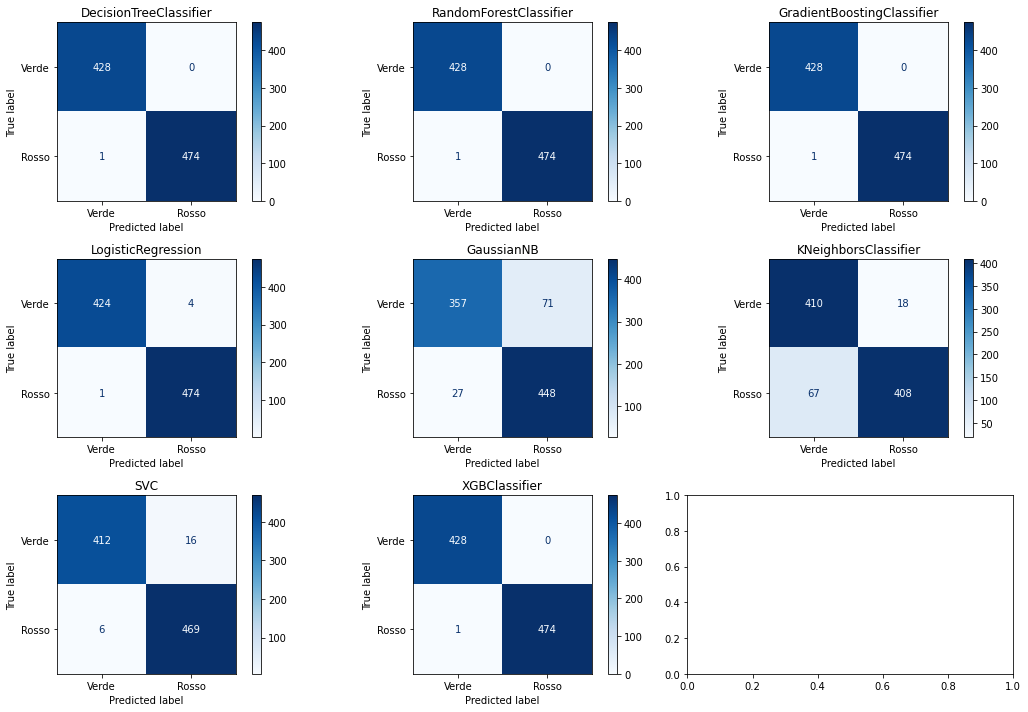

In [175]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['Verde','Rosso'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [176]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       475

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       475

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       1.00      1.00      1.00       475

    accuracy                           1.00       903
   macro avg       1.0

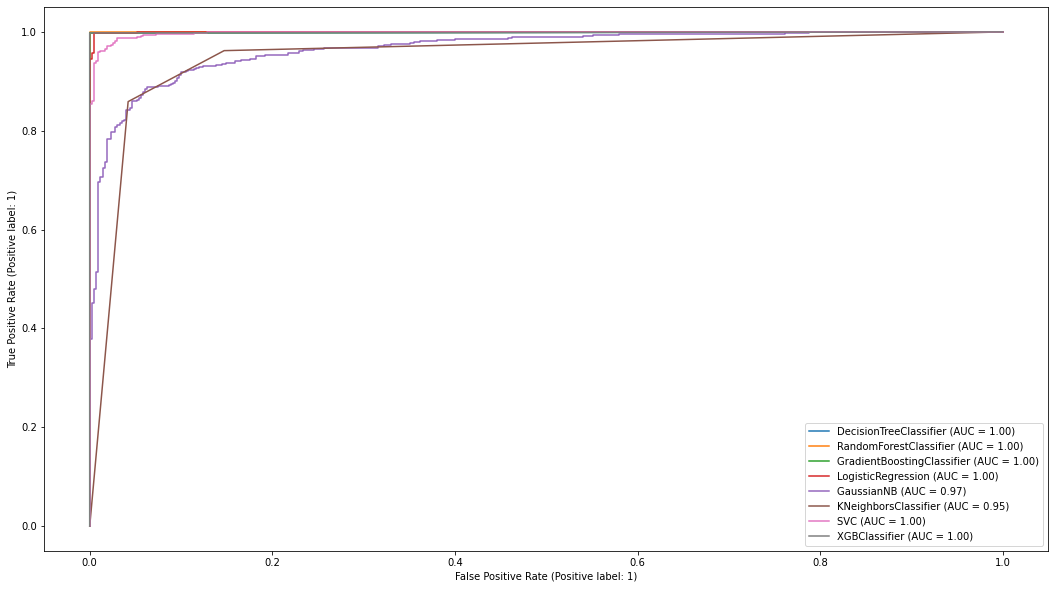

In [177]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

In [140]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    #models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table.T)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.996673,0.995713,0.998156,0.996925
Support Vector Classifier,0.999001,0.998773,0.999383,0.999075
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.984333,0.977512,1.000000,0.987332
Gaussian Naive Bayes,0.903238,0.877794,0.955048,0.914235


In [141]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = LogisticRegression(max_iter=10000)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    f1 = f1_score(y_test, test_y_pred,average='macro')
    featu.append(f1)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, F1: %.3f' % (i, test_acc, f1 ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.997, F1: 0.997
feature selected 3, Acc.Test: 0.997, F1: 0.997
feature selected 4, Acc.Test: 0.994, F1: 0.994
feature selected 5, Acc.Test: 0.994, F1: 0.994
feature selected 6, Acc.Test: 0.994, F1: 0.994
feature selected 7, Acc.Test: 0.994, F1: 0.994

 Best number of feature selection is: 3


In [142]:
classifier = LogisticRegression(max_iter=10000)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                #('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=10000))])